In [1]:
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
from torch.utils.data import DataLoader


from ..dataloaders import BATCH_SIZE, EMNIST_TRAIN, EMNIST_AUG_TRAIN


torch.manual_seed(1)

## PyTorch's [EMNIST dataset docs](https://pytorch.org/vision/main/generated/torchvision.datasets.EMNIST.html), [Paper](https://arxiv.org/abs/1702.05373v1)

SPLIT_TYPE = `Balanced`:  131,600 characters. 47 balanced classes. (a set of characters with an equal number of samples per class)

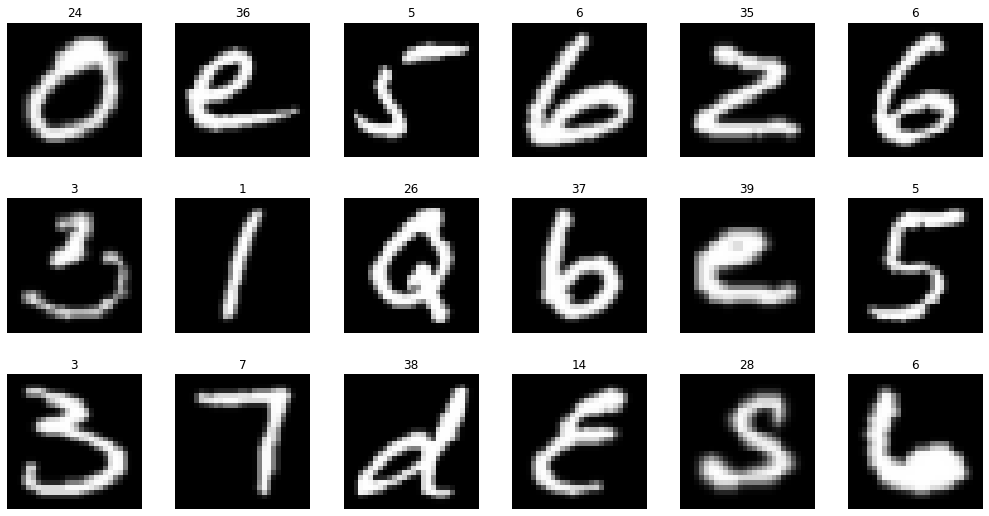

In [2]:
emnist = EMNIST_TRAIN

fig = plt.figure(figsize=(14, 8))
r, c = 3, 6
for i in range(r * c):
    fig.add_subplot(r, c, i+1)
    plt.tight_layout()
    plt.imshow(emnist[i][0].permute(2, 1, 0), cmap='gray')  # why tf I need to transpose it?
    plt.title(emnist[i][1])
    plt.axis("off")
plt.show()

Let's check how the transformations we use in `EMNIST_AUG` dataset work

In [22]:
example_img, example_target = emnist[5]

In [23]:
# just a helper function for displaying results
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False, figsize=(14, 3))
    for row_idx, row in enumerate(imgs):
        row = [example_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(img.permute(2, 1, 0), cmap="gray", **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(12)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

## [RandomAffine transform](https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomAffine.html#torchvision.transforms.RandomAffine)

Random affine transformation of the image keeping center invariant.
- `degrees` (sequence or number) – Range of degrees to select from. If degrees is a number instead of sequence like `(min, max)`, the range of degrees will be `(-degrees, +degrees)`. Set to 0 to deactivate rotations.
- `translate` (tuple, optional) – tuple of maximum absolute fraction for horizontal and vertical translations. For example translate=(a, b), then horizontal shift is randomly sampled in the range `-img_width * a < dx < img_width * a` and vertical shift is randomly sampled in the range `-img_height * b < dy < img_height * b`. Will not translate by default.
- `scale` (tuple, optional) – scaling factor interval, e.g `(a, b)`, then scale is randomly sampled from the range `a <= scale <= b`. Will keep original scale by default.

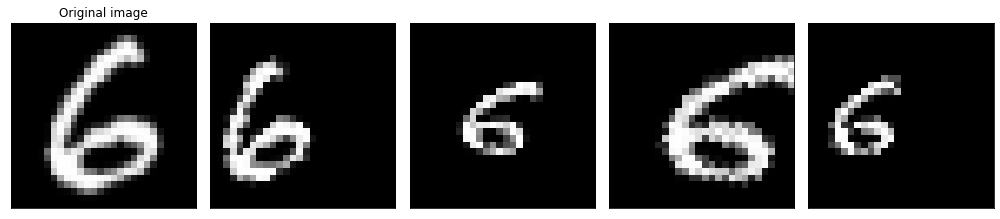

In [38]:
affine_transfomer = transforms.RandomAffine(degrees=30, translate=(0.1, 0.2), scale=(0.5, 1))
affine_imgs = [affine_transfomer(example_img) for _ in range(4)]
plot(affine_imgs)

## [RandomPerspective transform](https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomPerspective.html#torchvision.transforms.RandomPerspective)

- `distortion_scale` (float) – argument to control the degree of distortion and ranges from 0 to 1. Default is 0.5.
- `p` (float) – probability of the image being transformed. Default is 0.5.

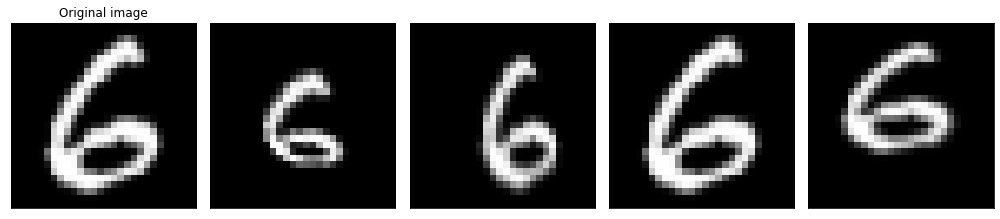

In [39]:
perspective_transformer = transforms.RandomPerspective(distortion_scale=0.6, p=0.75)
perspective_imgs = [perspective_transformer(example_img) for _ in range(4)]
plot(perspective_imgs)

Let's combine results of those transformations

Original image -> affine transform -> perspective transform

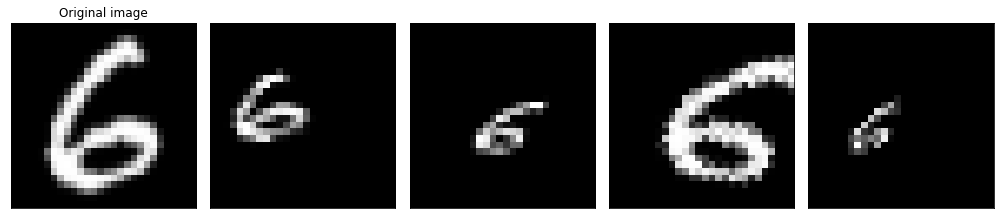

In [40]:
perspective_imgs = [perspective_transformer(img) for img in affine_imgs]
plot(perspective_imgs)

## [transforms.Compose](https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html#torchvision.transforms.Compose)

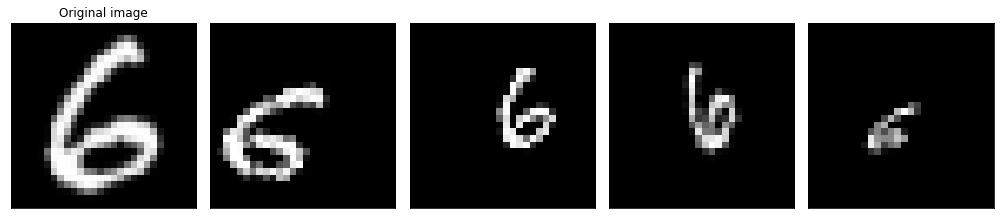

In [41]:
transformations = transforms.Compose(
    [
        transforms.RandomAffine(degrees=30, translate=(0.1, 0.2), scale=(0.5, 1)),
        transforms.RandomPerspective(distortion_scale=0.6, p=0.75),
    ]
)
composed_t_imgs = [transformations(example_img) for _ in range(4)]
plot(composed_t_imgs)

## Augmented EMNIST

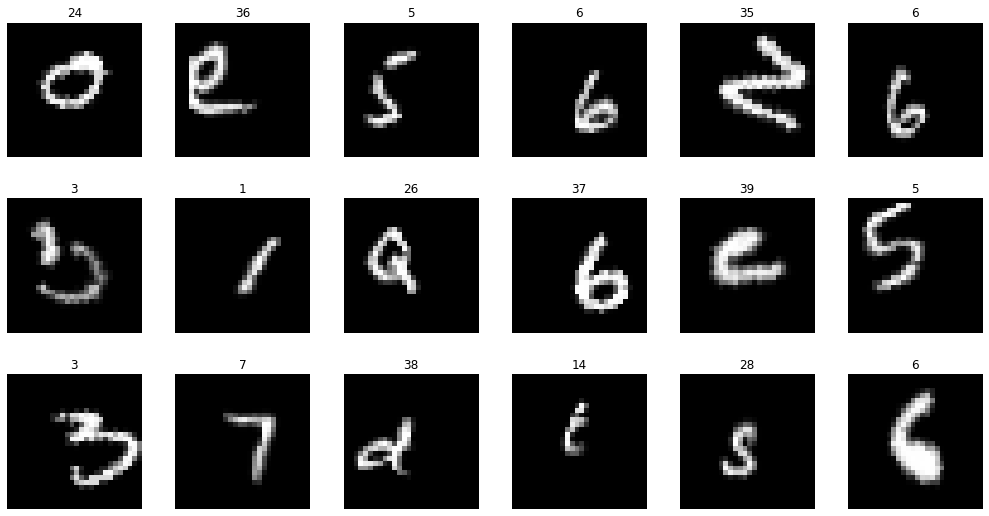

In [42]:
emnist_aug = EMNIST_AUG_TRAIN

fig = plt.figure(figsize=(14, 8))
r, c = 3, 6
for i in range(r * c):
    fig.add_subplot(r, c, i+1)
    plt.tight_layout()
    plt.imshow(emnist_aug[i][0].permute(2, 1, 0), cmap='gray')  # why tf I need to transpose it?
    plt.title(emnist_aug[i][1])
    plt.axis("off")
plt.show()

## DataLoaders

In [43]:
train_loader = DataLoader(EMNIST_TRAIN, batch_size=BATCH_SIZE, shuffle=True)